# Deep Learning with Keras

## Example 1: Predict Vehicle Speed Approaching a Bump

### Fabricate the Dataset

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs

n_samples = 10000

# Generate fabricated dataset (create two blobs of randomly distributed data at two corners of the graph)
centers = [(0.9, 0.05), (0.05, 0.94)]
x, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.4,
                  centers=centers, shuffle=False, random_state=42)

# Filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(x, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

# Convert the results back into numpy arrays:
x = np.array(features)
y = np.array(labels)

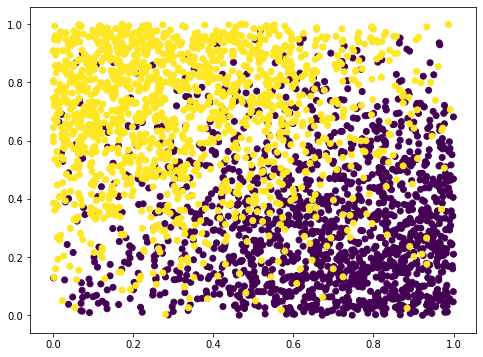

In [68]:
%matplotlib inline
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
plt.show()

### Split the Dataset into Train and Test Sets

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Import the Keras API:

In [70]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Setup the Model

In Keras, it's super-simple to set up a neural network of pretty much any topology. 

Set up a neural network with 2 input nodes (for the X and Y coordinates of each point), 32 hidden units in the middle, and a final sigmoid activation function above it all to choose one classification or the other (sigmoid is the activation function of choice for binary classification problems).

Start with just two layers, as this is a pretty simple dataset to classify:

In [71]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(1, activation='sigmoid'))

Get summary of the model:

In [72]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


Compile the model, using a given loss function and a given optimizer.

For binary classification problems, "binary_crossentropy" is the right choice. There are many optimization functions to choose from, but the Adam optimizer tends to perform well in many cases.

In [73]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train the Model

Training features and labels can be fed into the model using a given batch size of how many samples to process at once, and how many epochs to run the training over.

In [74]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Train on 2437 samples, validate on 610 samples
Epoch 1/10
2437/2437 - 0s - loss: 0.7033 - acc: 0.4805 - val_loss: 0.6880 - val_acc: 0.4721
Epoch 2/10
2437/2437 - 0s - loss: 0.6664 - acc: 0.5909 - val_loss: 0.6518 - val_acc: 0.7066
Epoch 3/10
2437/2437 - 0s - loss: 0.6324 - acc: 0.7952 - val_loss: 0.6184 - val_acc: 0.8164
Epoch 4/10
2437/2437 - 0s - loss: 0.6028 - acc: 0.8301 - val_loss: 0.5903 - val_acc: 0.8279
Epoch 5/10
2437/2437 - 0s - loss: 0.5767 - acc: 0.8412 - val_loss: 0.5650 - val_acc: 0.8377
Epoch 6/10
2437/2437 - 0s - loss: 0.5521 - acc: 0.8457 - val_loss: 0.5398 - val_acc: 0.8426
Epoch 7/10
2437/2437 - 0s - loss: 0.5279 - acc: 0.8469 - val_loss: 0.5163 - val_acc: 0.8426
Epoch 8/10
2437/2437 - 0s - loss: 0.5044 - acc: 0.8453 - val_loss: 0.4937 - val_acc: 0.8410
Epoch 9/10
2437/2437 - 0s - loss: 0.4825 - acc: 0.8445 - val_loss: 0.4732 - val_acc: 0.8393
Epoch 10/10
2437/2437 - 0s - loss: 0.4626 - acc: 0.8445 - val_loss: 0.4542 - val_acc: 0.8410


### Evaluate the Model

Keras prints out the accuracy as it trains the model.

However, evaulate the model against the test data just to make sure that its not overfitting to the training data. The evaluate() function does this:

In [75]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

610/610 [==============================] - 0s 47us/sample - loss: 0.4542 - acc: 0.8410
Test loss: 0.4541500075918729
Test accuracy: 0.8409836


## Example 2: Classify 4 Categories

### Fabricate the Dataset

Define four different categories in the test dataset, all of them overlapping in weird ways:

In [76]:
centers = [(0.9, 0.05), (0.05, 0.94), (0.3, 0.6), (0.8, 0.8)]
x, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.2,
                  centers=centers, shuffle=False, random_state=42)

# Filter out only the values that lie within [0,1]:
features = []
labels = []
for feature, label in zip(x, y):
    if (feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)
# Convert the results back into numpy arrays:
x = np.array(features)
y = np.array(labels)

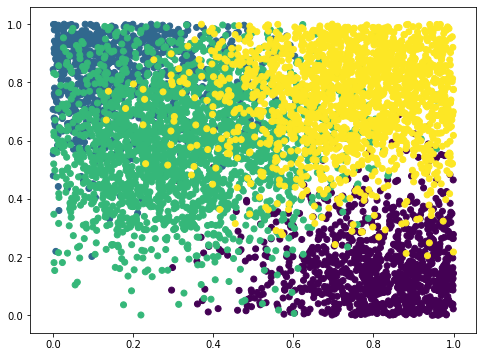

In [77]:
from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], c=y.astype(np.float))
plt.show()

### One-Hot Encoding

Neurons need to be interpreted as "ON (1)" or "OFF (0)" at the end of the day, so we need to encode the 4 categories in a binary manner. For this, "One-Hot Encoding" is used, which assigns a binary 0 or 1 in an array to represent a given value.

For example, if the labels of four categories aare 0, 1, 2, and 3, the fourth category (3) would be encoded as

0 0 0 1

And the second category (1) would be encoded as

0 1 0 0

Keras provides a handy to_categorical functions that does this conversion.

In [78]:
print (y[1])
y = keras.utils.to_categorical(y)
print (y[1])

0
[1. 0. 0. 0.]


### Split the Dataset into Train and Test Sets

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Setup the Model

Since there are 4 categories, the final output layer now has 4 units in it and, instead of sigmoid, softmax activation function is used. Softmax converts each output value into a probability for each classification, from which the highest one can be chosen as a prediction.

In [80]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(4, activation='softmax'))

Get summary of the model:

In [81]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 132       
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


Compile the model:

Since this is not a binary classification problem, use "categorical_crossentropy" instead of "binary_crossentropy" as the loss function.

In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train the Model

In [83]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

Train on 4818 samples, validate on 1205 samples
Epoch 1/10
4818/4818 - 0s - loss: 1.4146 - acc: 0.2395 - val_loss: 1.3381 - val_acc: 0.2905
Epoch 2/10
4818/4818 - 0s - loss: 1.2760 - acc: 0.3914 - val_loss: 1.2219 - val_acc: 0.5419
Epoch 3/10
4818/4818 - 0s - loss: 1.1756 - acc: 0.6416 - val_loss: 1.1381 - val_acc: 0.6340
Epoch 4/10
4818/4818 - 0s - loss: 1.0929 - acc: 0.6812 - val_loss: 1.0577 - val_acc: 0.6647
Epoch 5/10
4818/4818 - 0s - loss: 1.0148 - acc: 0.7034 - val_loss: 0.9808 - val_acc: 0.6888
Epoch 6/10
4818/4818 - 0s - loss: 0.9429 - acc: 0.7092 - val_loss: 0.9114 - val_acc: 0.7012
Epoch 7/10
4818/4818 - 0s - loss: 0.8778 - acc: 0.7200 - val_loss: 0.8489 - val_acc: 0.7046
Epoch 8/10
4818/4818 - 0s - loss: 0.8208 - acc: 0.7227 - val_loss: 0.7939 - val_acc: 0.7145
Epoch 9/10
4818/4818 - 0s - loss: 0.7710 - acc: 0.7273 - val_loss: 0.7454 - val_acc: 0.7195
Epoch 10/10
4818/4818 - 0s - loss: 0.7286 - acc: 0.7285 - val_loss: 0.7033 - val_acc: 0.7270


### Evaulate the Model

In [84]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1205/1205 [==============================] - 0s 46us/sample - loss: 0.7033 - acc: 0.7270
Test loss: 0.703315841261282
Test accuracy: 0.726971


### Experiment with the Model

<b>1. Deep Network (add another layer of neurons)</b>

Add an extra layer of 16 neurons in between the first layer of 32 neurons and the final layer of 4 neurons (it's a fairly common pattern to halve the number of neurons with each subsequent layer). The idea is to learn higher-level patterns in the data with that extra layer.

In [85]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 4)                 68        
Total params: 692
Trainable params: 692
Non-trainable params: 0
_________________________________________________________________
None
Train on 4818 samples, validate on 1205 samples
Epoch 1/10
4818/4818 - 0s - loss: 1.3227 - acc: 0.3910 - val_loss: 1.2636 - val_acc: 0.5660
Epoch 2/10
4818/4818 - 0s - loss: 1.2063 - acc: 0.5967 - val_loss: 1.1638 - val_acc: 0.5817
Epoch 3/10
4818/4818 - 0s - loss: 1.0926 - acc: 0.6550 - val_loss: 1.0353 - val_acc: 0.6531
Epoch 4/10
4818/4818 - 0s - loss: 0.9420 - acc: 0.6978 -

That extra layer improved the accuracy of the model!

<b>2. Deeper Network (add yet another layer of neurons)</b>

Sandwich an 8-neuron hidden layer in between the 16-neuron one and the final 4-neuron output layer:

In [91]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_59 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 36        
Total params: 796
Trainable params: 796
Non-trainable params: 0
_________________________________________________________________
None
Train on 4818 samples, validate on 1205 samples
Epoch 1/10
4818/4818 - 0s - loss: 1.3193 - acc: 0.3900 - val_loss: 1.2804 - val_acc: 0.4133
Epoch 2/10
4818/4818 - 0s - loss: 1.1947 - acc: 0.5054 - val_loss: 1.0995 - val_acc: 0.5261
Epoch 3/10
4818/

That actually did more harm than good. That usually indicates overfitting; this network is probably more complex than it needs to be at this point.

<b>3. Wide Network (add more neurons per layer)</b>

Go back to 2 layers, but add more neurons (64 instead of 32) to that single hidden layer.

In [92]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(x_test, y_test))

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_63 (Dense)             (None, 4)                 260       
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________
None
Train on 4818 samples, validate on 1205 samples
Epoch 1/10
4818/4818 - 0s - loss: 1.3347 - acc: 0.3645 - val_loss: 1.2594 - val_acc: 0.3676
Epoch 2/10
4818/4818 - 0s - loss: 1.1908 - acc: 0.4790 - val_loss: 1.1412 - val_acc: 0.4871
Epoch 3/10
4818/4818 - 0s - loss: 1.0776 - acc: 0.5670 - val_loss: 1.0300 - val_acc: 0.5942
Epoch 4/10
4818/4818 - 0s - loss: 0.9716 - acc: 0.6642 - val_loss: 0.9258 - val_acc: 0.6656
Epoch 5/10
4818/4818 - 0s - loss: 0.8760 - acc: 0.6984 - val_loss: 0.8333 - val_acc: 0.7037
Epoc

This is not as good as the network with 2 hidden layers, but better than the one with 3. Often, "wide" networks provide the same accuracy as compared to the "deep" networks, but the "deep" networks tend to converge more quickly. Had this "wide" network been allowed to run over more epochs, it would likely match the "deep" one.